### Explainable Vision Networks


In this work, we are going to poke our head inside the Neural Network architectures and try to understand what they actually learn. We will fully focus on Vision based neural networks since that's my niche.


#### Package Imports


In [1]:
## Necessary imports ##

import torch
import torch.nn as nn

from torchvision.models import vgg19_bn, VGG19_BN_Weights

from torchvision.utils import make_grid

from PIL import Image
import matplotlib.pyplot as plt


First thing we are going to do is load the model with pretrained weights.

**Note**: My main goal in this notebook is to appropiately derive visualizations from a trained network and hence everything would be related to visualization and all other stuff would be ignored (eg. training a model!).

Hence, for the purposes of this work, I am simply going to use the VGG19 network for poking what it had learnt inside.


#### Loading Model


In [2]:
## Setting weights ##

weights = VGG19_BN_Weights.IMAGENET1K_V1

## Loading model ##

vgg_model = vgg19_bn(weights=weights, progress=True)
vgg_model.eval()

## Vgg transformation ##

augmentation = weights.transforms()


Amazing... Our model is loaded!!

Lets see the `vgg_model` to see the layers and pick our layer to visualize.


In [3]:
## Checking vgg19 model ##

vgg_model


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

Most rich and basic level features are learnt in the first or the second convolutional layers weights. It would be nice to visualize those too. But first we will visualize the activations.

Lets see those.

These layers are given as given as: `vgg_model.features[0]` and `vgg_model.features[3]`. I have shown an example in the next cell.


In [4]:
## Setting the layer ##

visualization_layer = vgg_model.features[0]

visualization_layer


Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Now lets load our test image.

I am going to use my favourite dog image for this work.

It is visualized below.


#### Loading Test Image


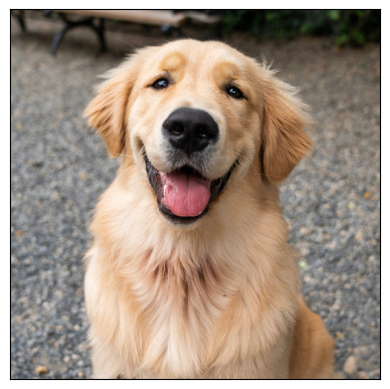

In [5]:
## Loading image via PIL and showing it ##

img = Image.open("dog.jpg")

plt.imshow(img)
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


Perfect its loaded...

Now its time to make a hook such that we can extract the output from the correct layer.


#### Setting forward hook


In [6]:
## Forward Hook ##

activations = []


def hook_func(self, inp, out):
    activations.append(out)


vgg_model.features[0].register_forward_hook(hook_func)
vgg_model.features[3].register_forward_hook(hook_func)

## Adding few more later layers output ##
vgg_model.features[33].register_forward_hook(hook_func)
vgg_model.features[49].register_forward_hook(hook_func)


In [7]:
## Setting the activations for later visualizations ##

inp = augmentation(img)

final_out = vgg_model(inp.unsqueeze(0))


And lets check if we have anything stored in activations.


In [8]:
## Checking activations ##

print(f"Lenght of activations : {len(activations)}")


Lenght of activations : 4


Indeed. Our forwarded outputs are stored in the list.

Now lets visualize them.


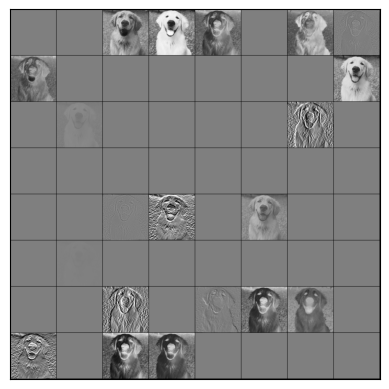

In [9]:
## Visualizing first feature maps ##

first_conv_activations = (
    activations[0].squeeze(0).unsqueeze(1)
)  # To make (64 , 1 , 224, 224)

first_conv_activations = torch.sigmoid(first_conv_activations)

n_row = int(first_conv_activations.shape[0] ** 0.5)

plt.imshow(make_grid(first_conv_activations, n_rows=n_row).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


Similarly, lets visualize the next layer.


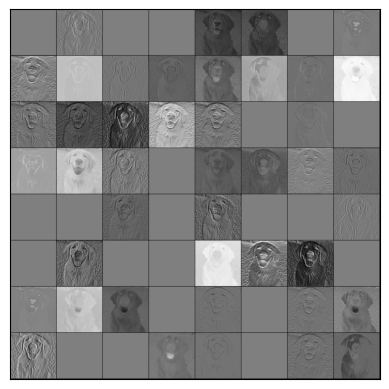

In [10]:
## Visualizing second feature maps ##

second_conv_activations = (
    activations[1].squeeze(0).unsqueeze(1)
)  # To make (64 , 1 , 224, 224)

second_conv_activations = torch.sigmoid(second_conv_activations)

n_row = int(second_conv_activations.shape[0] ** 0.5)

plt.imshow(make_grid(second_conv_activations, n_rows=n_row).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


Lets also look at later layers.


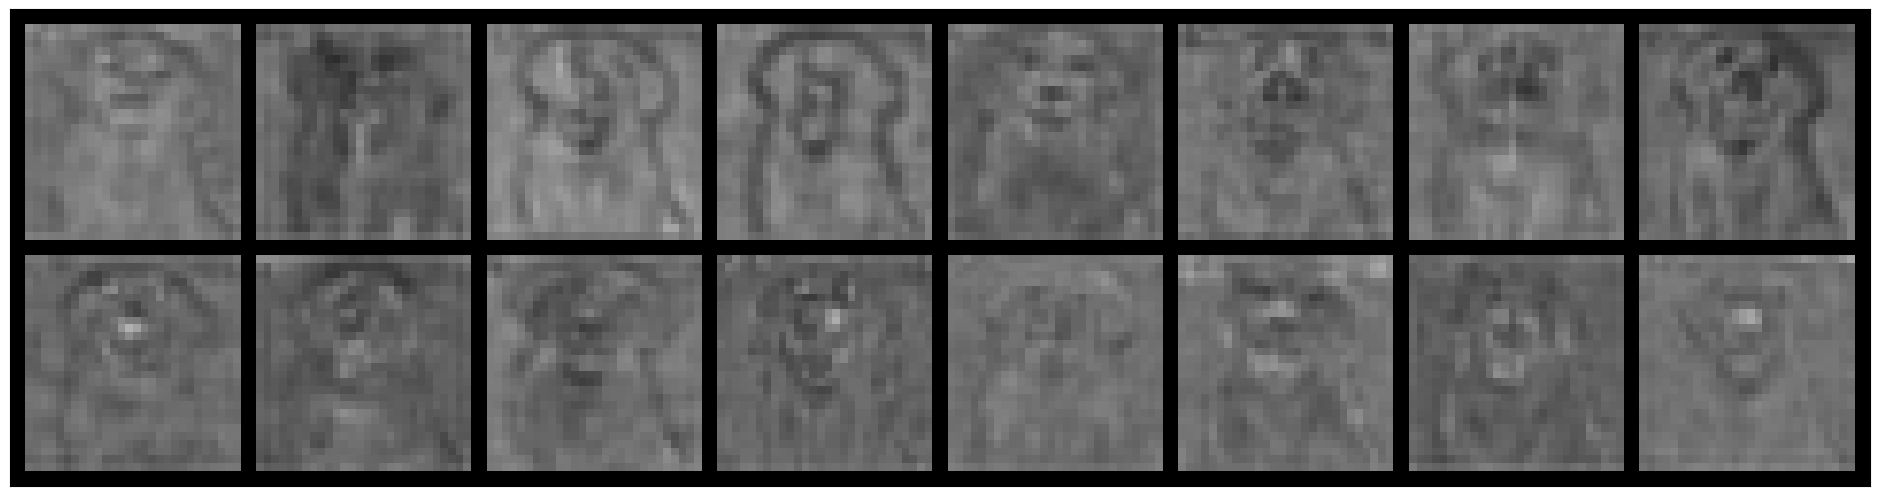

In [11]:
## Visualizing third feature maps ##

third_conv_activations = activations[2].squeeze(0).unsqueeze(1)

third_conv_activations = torch.sigmoid(third_conv_activations)

plt.figure(figsize=(24, 16))
plt.imshow(make_grid(third_conv_activations[:16], n_rows=8).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


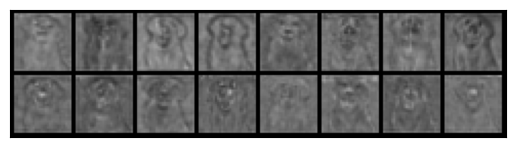

In [12]:
## Visualizing fourth feature maps ##

fourth_conv_activations = (
    activations[2].squeeze(0).unsqueeze(1)
)  # To make (64 , 1 , 224, 224)

fourth_conv_activations = torch.sigmoid(fourth_conv_activations)

plt.imshow(make_grid(fourth_conv_activations[:16], n_rows=8).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


We can also visualize the weights of the pretrained network.


#### Visualizing weights


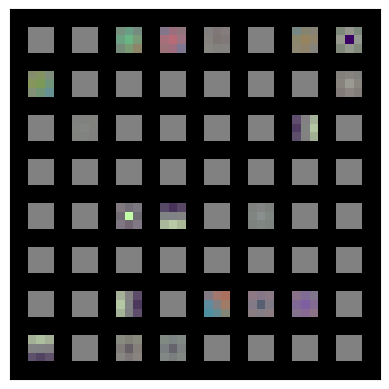

In [13]:
## Visualizing first conv layer weights ##

first_conv_weights = vgg_model.features[0].weight

first_conv_weights = (first_conv_weights - torch.min(first_conv_weights)) / (
    torch.max(first_conv_weights) - torch.min(first_conv_weights)
)

plt.imshow(make_grid(first_conv_weights, n_rows=8).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


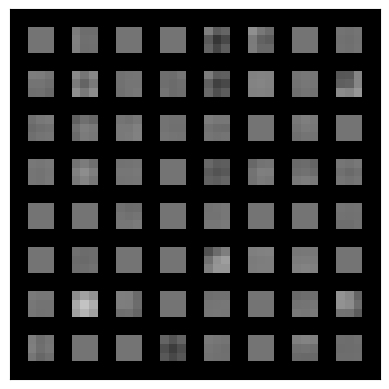

In [14]:
## Visualizing second conv layer weights ##

second_conv_weights = vgg_model.features[3].weight

second_conv_weights = (second_conv_weights - torch.min(second_conv_weights)) / (
    torch.max(second_conv_weights) - torch.min(second_conv_weights)
)

plt.imshow(make_grid(second_conv_weights[:, 8:9, :, :], n_rows=8).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


torch.Size([512, 512, 3, 3])


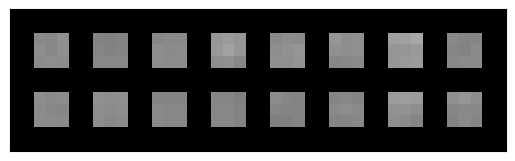

In [15]:
## Visualizing later conv layer weights ##

last_conv_weights = vgg_model.features[49].weight

print(last_conv_weights.shape)

last_conv_weights = (last_conv_weights - torch.min(last_conv_weights)) / (
    torch.max(last_conv_weights) - torch.min(last_conv_weights)
)

plt.imshow(make_grid(last_conv_weights[:16, 12:13, :, :], n_rows=8).permute(1, 2, 0))
plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)
plt.show()


Nice... We understood a bit of the visualization techniques. In the next jupyter notebook, we are going to look at much finer visualization techniques.
